## Exploratory data analysis (EDA) and Feature Engineering

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


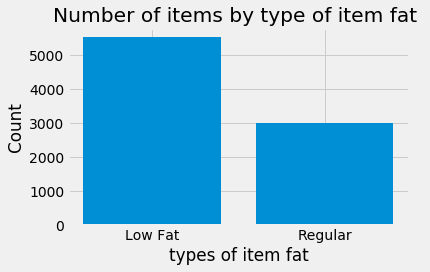

In [3]:
plt.style.use('fivethirtyeight')
data['Item_Fat_Num']=data['Item_Fat_Content'].map({'Low Fat':0,'Regular':1,'low fat':0,'LF':0,'reg':1})
df=data.loc[:,['Item_Identifier','Item_Fat_Num']]
df=df.groupby('Item_Fat_Num').count()
labels=['Low Fat','Regular']
plt.bar(df.index,df['Item_Identifier'])
plt.xticks(ticks=df.index,labels=labels)
plt.title('Number of items by type of item fat ')
plt.xlabel('types of item fat')
plt.ylabel('Count')
plt.tight_layout()

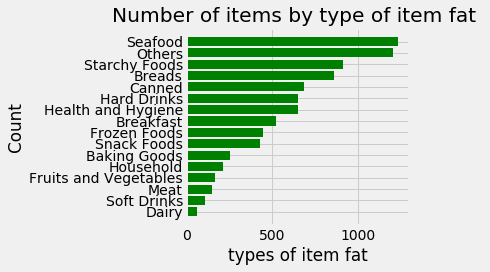

In [4]:
df=data.loc[:,['Item_Type','Item_Weight']]
df=df.groupby('Item_Type').sum()
df=df.sort_values(by=['Item_Weight'])
column=pd.DataFrame(np.array(df.Item_Weight).argsort()+1)
column=column.set_index(df.index)
data['Item_Type_Num']=data['Item_Type'].map({'Dairy':column.loc['Dairy',0],'Soft Drinks':column.loc['Soft Drinks',0],'Meat':column.loc['Meat',0],'Fruits and Vegetables':column.loc['Fruits and Vegetables',0],'Household':column.loc['Household',0],'Baking Goods':column.loc['Baking Goods',0],'Snack Foods':column.loc['Snack Foods',0],'Frozen Foods':column.loc['Frozen Foods',0],'Breakfast':column.loc['Breakfast',0],'Health and Hygiene':column.loc['Health and Hygiene',0],'Hard Drinks':column.loc['Hard Drinks',0],'Canned':column.loc['Canned',0],'Breads':column.loc['Breads',0],'Starchy Foods':column.loc['Starchy Foods',0],'Others':column.loc['Others',0],'Seafood':column.loc['Seafood',0] })
df=data.loc[:,['Item_Type_Num','Item_Identifier']]
df=df.groupby('Item_Type_Num').count()

labels=['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood']

plt.barh(df.index,df['Item_Identifier'],color='g')
plt.yticks(ticks=df.index,labels=labels)
plt.title('Number of items by type of item fat ')
plt.xlabel('types of item fat')
plt.ylabel('Count')
plt.tight_layout()

Text(0, 0.5, 'Sales')

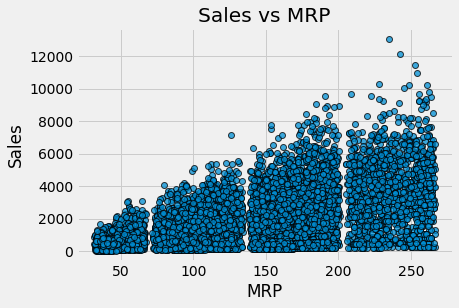

In [5]:
Purchase=data['Item_Outlet_Sales']
Weight=data['Item_Weight']
Num_Type=data['Item_Type_Num']
MRP=data['Item_MRP']
MRP_sqrt=pd.DataFrame(np.log(MRP))
plt.scatter(MRP,Purchase,edgecolor='black',linewidth=1,alpha=0.75)
plt.title('Sales vs MRP')
plt.xlabel('MRP')
plt.ylabel('Sales')


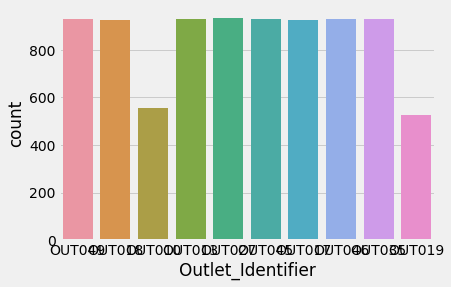

In [6]:
sns.countplot(x='Outlet_Identifier',data=data)

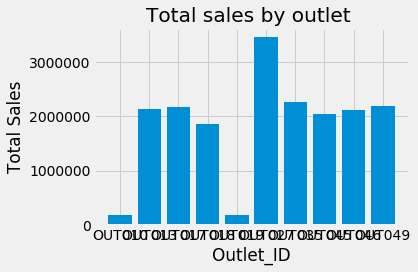

In [7]:
df=data.loc[:,['Outlet_Identifier','Item_Outlet_Sales']]
df1=df.groupby('Outlet_Identifier').sum()
plt.bar(df1.index,df1['Item_Outlet_Sales'])
plt.title('Total sales by outlet ')
plt.xlabel('Outlet_ID')
plt.ylabel('Total Sales')
plt.tight_layout()

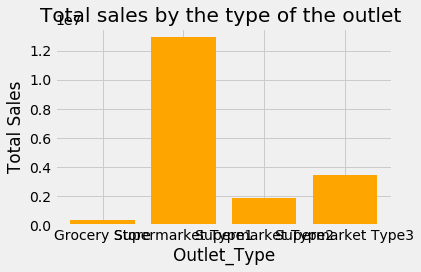

In [8]:
df=data.loc[:,['Outlet_Type','Item_Outlet_Sales']]
df1=df.groupby('Outlet_Type').sum()
plt.bar(df1.index,df1['Item_Outlet_Sales'],color='orange')
plt.title('Total sales by the type of the outlet ')
plt.xlabel('Outlet_Type')
plt.ylabel('Total Sales')
plt.tight_layout()

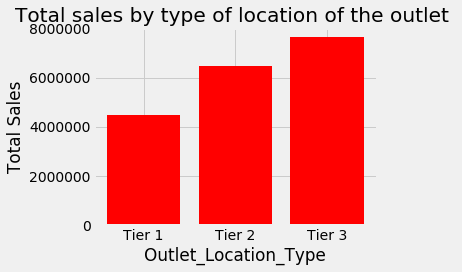

In [10]:
df=data.loc[:,['Outlet_Location_Type','Item_Outlet_Sales']]
df1=df.groupby('Outlet_Location_Type').sum()
plt.bar(df1.index,df1['Item_Outlet_Sales'],color='red')
plt.title('Total sales by type of location of the outlet ')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Total Sales')
plt.tight_layout()

## Machine_Learning_Pipeline 1 (Preprocessing  manually)

In [11]:
data['Outlet_Identifier_Num']=data['Outlet_Identifier'].map({'OUT049':49,'OUT018':18,'OUT010':10,'OUT013':13,'OUT027':27,'OUT045':45,'OUT017':17,'OUT046':46,'OUT035':35,'OUT019':19})
data['Outlet_Location_Type_Num']=data['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
data['Outlet_Type_Num']=data['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
data['Item_Weight'].fillna(np.mean(data['Item_Weight']),inplace=True)
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Num,Item_Type_Num,Outlet_Identifier_Num,Outlet_Location_Type_Num,Outlet_Type_Num
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,12,49,1,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,8,18,3,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,7,49,1,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1,16,10,3,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,14,13,3,1


In [12]:
#Now we calculate the correlation coefficient( for the continuous variables) and the point-biserial correlation coefficient (for the categorical variables)
from scipy import stats
print('For continuous variables: \n ')
for i in ['Item_Weight','Item_Visibility','Item_MRP']:
   
    c,p=stats.pearsonr(data[i],data['Item_Outlet_Sales'])
    print('\n The value of the correlation coefficient of \n'+i+': \n',format(c))

print('\n \n For categorical variables: \n')
for i in ['Item_Fat_Num','Outlet_Identifier_Num','Outlet_Location_Type_Num','Outlet_Type_Num']:
    c,p=stats.pointbiserialr(data[i],data['Item_Outlet_Sales'])
    print('\n The value of the point-biserial correlation coefficient of '+i +': \n',format(c))

For continuous variables: 
 

 The value of the correlation coefficient of 
Item_Weight: 
 0.011550000817703871

 The value of the correlation coefficient of 
Item_Visibility: 
 -0.12862461222077026

 The value of the correlation coefficient of 
Item_MRP: 
 0.5675744466569194

 
 For categorical variables: 


 The value of the point-biserial correlation coefficient of Item_Fat_Num: 
 0.018718533623894355

 The value of the point-biserial correlation coefficient of Outlet_Identifier_Num: 
 0.1526604642853042

 The value of the point-biserial correlation coefficient of Outlet_Location_Type_Num: 
 0.08936674677409288

 The value of the point-biserial correlation coefficient of Outlet_Type_Num: 
 0.40152249995360023


In [13]:
X=data.loc[:,['Outlet_Location_Type_Num','Outlet_Type_Num','Outlet_Identifier_Num','Item_Visibility','Item_MRP','Item_Fat_Num','Item_Type_Num','Item_Weight']]
y=np.array(data['Item_Outlet_Sales'])
X.isnull().any()

Outlet_Location_Type_Num    False
Outlet_Type_Num             False
Outlet_Identifier_Num       False
Item_Visibility             False
Item_MRP                    False
Item_Fat_Num                False
Item_Type_Num               False
Item_Weight                 False
dtype: bool

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)


## Building ML model

### Gradient Boosting Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
params={'n_estimators':range(30,91,10)}
reg=GradientBoostingRegressor(learning_rate=0.1)
model=GridSearchCV(reg,params,cv=5,scoring='r2')
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

{'n_estimators': 40}
0.6050755318762286


In [16]:
params={'max_depth':range(3,9,1),'min_samples_split':range(40,81,10)}
reg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=40)
model=GridSearchCV(reg,params,cv=5,scoring='r2')
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

{'max_depth': 3, 'min_samples_split': 60}
0.6053594269415224


In [21]:
from sklearn.metrics import r2_score
model=GradientBoostingRegressor(learning_rate=0.1,n_estimators=40,max_depth=3,min_samples_split=60)
model.fit(X_train,y_train)
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)
print('The train score is : ',format(r2_score(y_train,y_predict_train)))
print('The test score is : ',format(r2_score(y_test,y_predict_test)))

The train score is :  0.6204096605929222
The test score is :  0.5792148722704805


## Machine learning model using make_pipeline module

#####  In this ML pipeline we will change the preprocessing method for the two categorical variables Outlet_Location_Type,Outlet_Type (we will use one hot encoding instead of label encoding ) 

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column_trans=make_column_transformer((OneHotEncoder(),['Outlet_Location_Type','Outlet_Type']),
                                    remainder='passthrough')
X=data.loc[:,['Outlet_Location_Type','Outlet_Type','Outlet_Identifier_Num','Item_Visibility','Item_MRP','Item_Fat_Num','Item_Type_Num','Item_Weight']]
X_train=X.loc[range(0,6393),:]
y_train=y[0:6393]
X_test=X.loc[range(6393,8523),:]
y_test=y[6393:]
X.shape

(8523, 8)

In [23]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans,GradientBoostingRegressor())
parameters={'gradientboostingregressor__n_estimators':range(30,81,10)}
pipeline=GridSearchCV(pipe,parameters,cv=5,scoring='r2')
pipeline.fit(X_train,y_train)
print(pipeline.best_params_)
print(pipeline.best_score_)

{'gradientboostingregressor__n_estimators': 40}
0.5977650669276895


In [24]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans,GradientBoostingRegressor(n_estimators=40))
parameters={'gradientboostingregressor__max_depth':range(3,9,1),'gradientboostingregressor__min_samples_split':range(40,81,10)}
pipeline=GridSearchCV(pipe,parameters,cv=5,scoring='r2')
pipeline.fit(X_train,y_train)
print(pipeline.best_params_)
print(pipeline.best_score_)

{'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__min_samples_split': 40}
0.5979632737922985


In [25]:
pipe=make_pipeline(column_trans,GradientBoostingRegressor(n_estimators=40,min_samples_split=40,max_depth=3))
pipe.fit(X_train,y_train)
y_predict_train=pipe.predict(X_train)
y_predict_test=pipe.predict(X_test)
print('The train score is : ',format(r2_score(y_train,y_predict_train)))
print('The test score is : ',format(r2_score(y_test,y_predict_test)))

The train score is :  0.6165100242415152
The test score is :  0.6006037896405119


### With dimensionality reduction (Using PCA)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pipe=make_pipeline(column_trans,PCA(n_components=12),GradientBoostingRegressor())
parameters={'gradientboostingregressor__n_estimators':range(30,81,10)}
pipeline=GridSearchCV(pipe,parameters,cv=5,scoring='r2')
pipeline.fit(X_train,y_train)
print(pipeline.best_params_)
print(pipeline.best_score_)

{'gradientboostingregressor__n_estimators': 50}
0.5967837622187563


In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pipe=make_pipeline(column_trans,PCA(n_components=12),GradientBoostingRegressor(n_estimators=50))
parameters={'gradientboostingregressor__max_depth':range(3,9,1),'gradientboostingregressor__min_samples_split':range(40,81,10)}
pipeline=GridSearchCV(pipe,parameters,cv=5,scoring='r2')
pipeline.fit(X_train,y_train)
print(pipeline.best_params_)
print(pipeline.best_score_)

{'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__min_samples_split': 60}
0.5973816677567568


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pca=PCA()
pipe=make_pipeline(column_trans,pca,GradientBoostingRegressor(min_samples_split=60,max_depth=3,n_estimators=50))
parameters={'pca__n_components':range(2,11)}
pipeline=GridSearchCV(pipe,parameters,cv=5,scoring='r2')
pipeline.fit(X_train,y_train)
print(pipeline.best_params_)
print(pipeline.best_score_)

{'pca__n_components': 9}
0.5983787636143822


In [29]:
from sklearn.metrics import r2_score

pipe=make_pipeline(column_trans,PCA(n_components=9),GradientBoostingRegressor(n_estimators=50,min_samples_split=60,max_depth=3))
pipe.fit(X_train,y_train)
y_predict_train=pipe.predict(X_train)
y_predict_test=pipe.predict(X_test)
print(r2_score(y_train,y_predict_train))
print(r2_score(y_test,y_predict_test))

0.6308122912477254
0.5980799973680947
